In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import urllib.request

url = 'http://ergast.com/downloads/f1db_csv.zip'
filehandle, _ = urllib.request.urlretrieve(url)
zf = zipfile.ZipFile(filehandle, 'r')

results_df = pd.read_csv(zf.open('results.csv'))
drivers_df = pd.read_csv(zf.open('drivers.csv'))
lap_times_df = pd.read_csv(zf.open('lap_times.csv'))
races_df = pd.read_csv(zf.open('races.csv'))
pit_stops_df = pd.read_csv(zf.open('pit_stops.csv'))

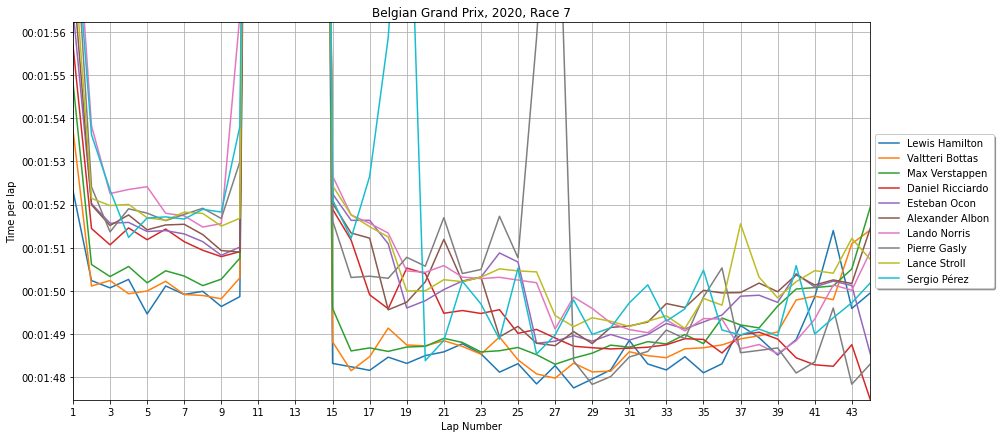

In [2]:
raceId = lap_times_df.raceId.drop_duplicates().iloc[-1]
race_df = lap_times_df[lap_times_df["raceId"] == raceId].copy()
pit_stop_df = pit_stops_df[pit_stops_df.raceId == raceId]
plt.figure(figsize=(14, 6))

for driverId in results_df[results_df.raceId == raceId]["driverId"].iloc[:10]:
    driver_info = drivers_df[drivers_df["driverId"] == driverId]
    driver_name = driver_info["forename"] + ' ' + driver_info["surname"]
    plt.plot(race_df[race_df.driverId == driverId].lap, 
             pd.to_datetime(race_df[race_df.driverId == driverId].milliseconds, unit='ms'),
             label = driver_name.iloc[0])

plt.legend(loc='center left', fancybox=True, shadow=True, bbox_to_anchor=(1, 0.5))
plt.xticks(np.arange(race_df["lap"].values.min(), race_df["lap"].values.max()+1, 2.0))
plt.xlim(race_df["lap"].values.min(),
         race_df["lap"].values.max())
q1 = race_df.milliseconds.quantile(0.25)
q3 = race_df.milliseconds.quantile(0.75)
cons = (q3 - q1) * 1.5
high_lim = q3 + cons
low_lim = q1 - cons
plt.ylim(pd.to_datetime(race_df.milliseconds.min(), unit='ms'),
         pd.to_datetime(high_lim, unit='ms'))
race_name = races_df[races_df["raceId"] == raceId]["name"].iloc[0]
race_year = races_df[races_df["raceId"] == raceId]["year"].iloc[0]
race_round = races_df[races_df["raceId"] == raceId]["round"].iloc[0]
plt.grid()
plt.title(str(race_name) + ', ' + str(race_year) + ', Race ' + str(race_round))
plt.ylabel('Time per lap')
plt.tight_layout()
plt.xlabel('Lap Number')
plt.show()